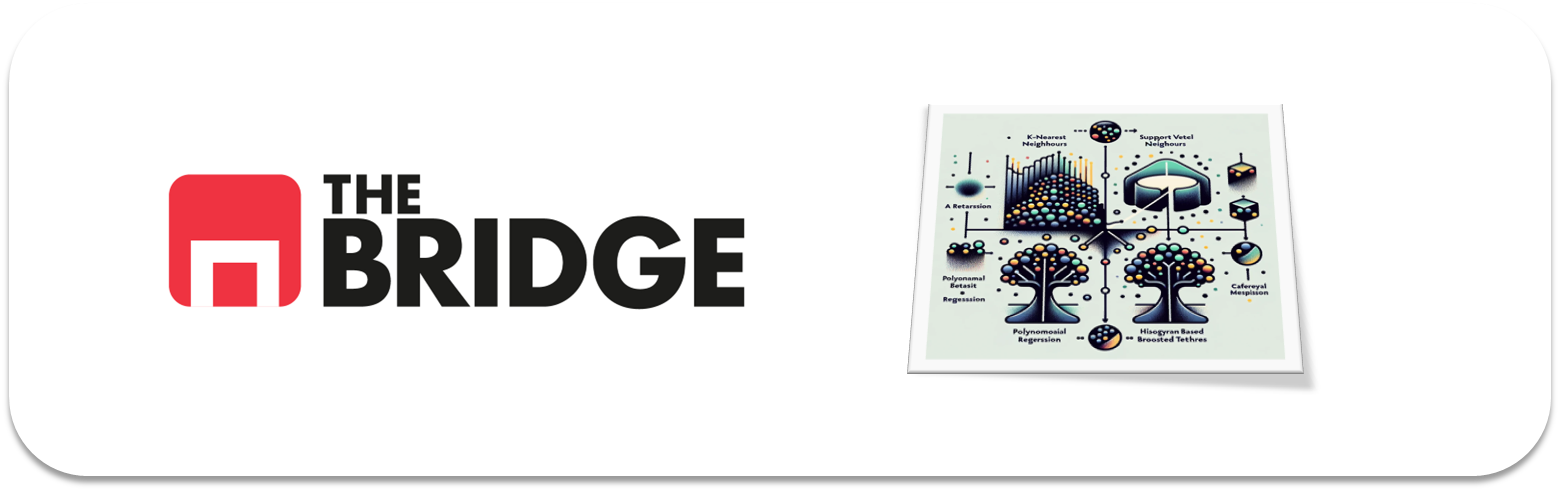

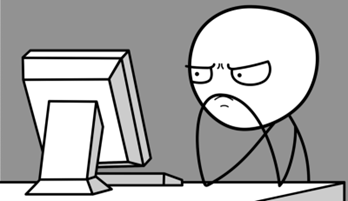

Para ejercitarte y afianzar lo aprendido sobre **Otros Modelos de aprendizaje supervisado**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Ruta del archivo CSV 
dataset_path = r"C:\Users\hp\Desktop\Python Scripts\Sleep_health_and_lifestyle_dataset.csv"

# 📌 Intentar cargar el dataset con diferentes delimitadores
try:
    data = pd.read_csv(dataset_path, delimiter=",", encoding="utf-8")
    print("✅ Dataset cargado correctamente.")
except Exception as e:
    print(f"❌ Error al cargar el dataset: {e}")

# 📌 Verificar los nombres de las columnas
print("📌 Nombres de las columnas originales:")
print(data.columns)

# 📌 Eliminar espacios y caracteres especiales de los nombres de las columnas
data.columns = data.columns.str.strip().str.replace(r"[\r\n]", "", regex=True)

# 📌 Mostrar nombres corregidos
print("📌 Nombres de las columnas corregidos:")
print(data.columns)

# 📌 Verificar si "Quality of Sleep" existe
if "Quality of Sleep" not in data.columns:
    print("❌ La columna 'Quality of Sleep' no se encuentra en el dataset.")
else:
    print("✅ La columna 'Quality of Sleep' fue encontrada correctamente.")

    # 📌 Analizar la distribución de "Quality of Sleep"
    plt.figure(figsize=(8, 5))
    sns.histplot(data['Quality of Sleep'], bins=20, kde=True)
    plt.title('Distribución de la Calidad del Sueño')
    plt.xlabel('Quality of Sleep')
    plt.ylabel('Frecuencia')
    plt.show()


✅ Dataset cargado correctamente.
📌 Nombres de las columnas originales:
Index(['Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder'], dtype='object')
📌 Nombres de las columnas corregidos:
Index(['Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder'], dtype='object')
❌ La columna 'Quality of Sleep' no se encuentra en el dataset.


## PARTE 1. KNN

En la primera parte  vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating (ojo, no el sentimiento), en función del sentimiento del comentario y su valor y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

### Ejercicio 1

Lee el archivo de entrada "reviews_sentiment.csv" y carga su contenido en un dataframe. Muestras sus primeras líneas, su información general y define una variable "target" asignándole el nombre de la columna que contenga el target del problema. 

✅ Dataset cargado correctamente con ';' como delimitador.

📌 Nombres de las columnas corregidos:
Index(['Review Title', 'Review Text', 'wordcount', 'titleSentiment',
       'textSentiment', 'Star Rating', 'sentimentValue'],
      dtype='object')


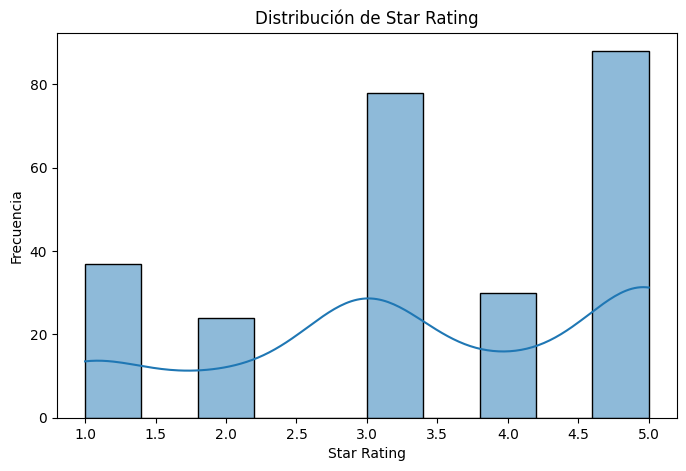

In [2]:


# Cargar el dataset con delimitador correcto
try:
    data = pd.read_csv(dataset_path, delimiter=";", encoding="utf-8", on_bad_lines="skip")
    print("✅ Dataset cargado correctamente con ';' como delimitador.")
except Exception as e:
    print(f"❌ Error al cargar el dataset: {e}")
    exit()

# Verificar nombres de las columnas después de la corrección
print("\n📌 Nombres de las columnas corregidos:")
print(data.columns)

# Definir la variable objetivo (target) correctamente
target = "Star Rating"

# Verificar si la columna objetivo existe
if target not in data.columns:
    print(f"❌ Error: La columna '{target}' no se encuentra en el dataset. Verifica los nombres de las columnas en la salida anterior.")
    exit()

# Graficar la distribución de la variable objetivo
plt.figure(figsize=(8, 5))
sns.histplot(data[target], bins=10, kde=True)
plt.title(f'Distribución de {target}')
plt.xlabel(target)
plt.ylabel('Frecuencia')
plt.show()



Dataset cargado correctamente.
Columnas disponibles en el dataset: ['Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder']
Error al ejecutar la función: La columna objetivo 'Quality of Sleep' no está en el DataFrame.


C:\Users\hp\AppData\Local\Temp\ipykernel_1292\460394910.py:64: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


### Ejericicio 2

Muestra la distribución del target y coméntala brevemente.


Nombres de las columnas:
Index(['Review Title', 'Review Text', 'wordcount', 'titleSentiment',
       'textSentiment', 'Star Rating', 'sentimentValue'],
      dtype='object')


C:\Users\hp\AppData\Local\Temp\ipykernel_21196\4178302735.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[target], palette="viridis")


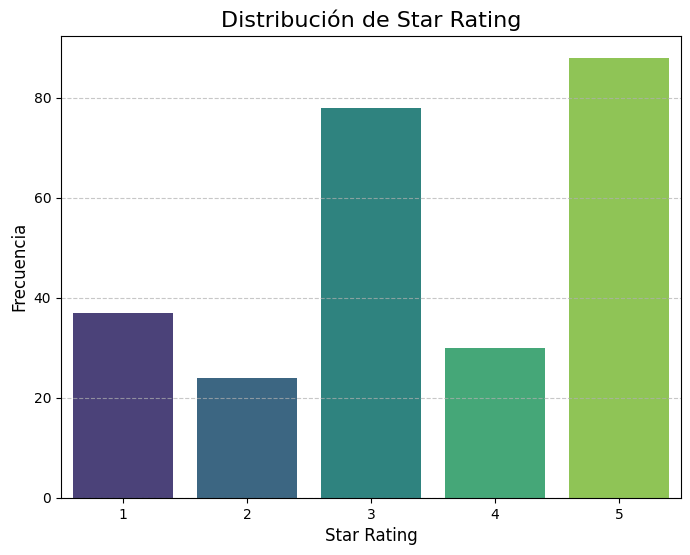

In [3]:



# Verificar nombres de las columnas
print("\nNombres de las columnas:")
print(data.columns)

# Definir la columna objetivo (target)
target = "Star Rating"

# Verificar si la columna objetivo existe
if target not in data.columns:
    print(f"Error: La columna '{target}' no se encuentra en el dataset.")
    exit()

# Mostrar distribución del target
plt.figure(figsize=(8, 6))
sns.countplot(x=data[target], palette="viridis")
plt.title(f'Distribución de {target}', fontsize=16)
plt.xlabel(target, fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Ejercicio 3

Deshazte de la columna "titleSentiment" que tiene nulos y no vamos a emplearla.

In [4]:




# Cargar el dataset con el delimitador correcto
data = pd.read_csv(dataset_path, delimiter=";", encoding="utf-8", on_bad_lines="skip")

# Mostrar las columnas antes de eliminar
print("\nNombres de las columnas antes de eliminar 'titleSentiment':")
print(data.columns)

# Verificar si la columna "titleSentiment" existe y eliminarla
if "titleSentiment" in data.columns:
    data = data.drop(columns=["titleSentiment"])
    print("\nLa columna 'titleSentiment' ha sido eliminada.")
else:
    print("\nLa columna 'titleSentiment' no se encuentra en el dataset.")

# Mostrar las columnas después de eliminar
print("\nNombres de las columnas después de eliminar 'titleSentiment':")
print(data.columns)

# Verificar si hay nulos en el dataset
print("\nValores nulos restantes en el dataset:")
print(data.isnull().sum())



Nombres de las columnas antes de eliminar 'titleSentiment':
Index(['Review Title', 'Review Text', 'wordcount', 'titleSentiment',
       'textSentiment', 'Star Rating', 'sentimentValue'],
      dtype='object')

La columna 'titleSentiment' ha sido eliminada.

Nombres de las columnas después de eliminar 'titleSentiment':
Index(['Review Title', 'Review Text', 'wordcount', 'textSentiment',
       'Star Rating', 'sentimentValue'],
      dtype='object')

Valores nulos restantes en el dataset:
Review Title      0
Review Text       0
wordcount         0
textSentiment     0
Star Rating       0
sentimentValue    0
dtype: int64


### Ejercicio 4

Haz el split en train y test.

In [11]:




# Mostrar las columnas disponibles
print("\nNombres de las columnas:")
print(data.columns)

# Eliminar la columna "titleSentiment" si existe
if "titleSentiment" in data.columns:
    data = data.drop(columns=["titleSentiment"])
    print("\nColumna 'titleSentiment' eliminada.")

# Definir las variables independientes (X) y dependiente (y)
X = data.drop(columns=["Star Rating"])  # Variables predictoras
y = data["Star Rating"]  # Variable objetivo

# Realizar el split en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos
print(f"\nTamaño del conjunto de entrenamiento (train): {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba (test): {X_test.shape[0]} filas")





Nombres de las columnas:
Index(['Review Title', 'Review Text', 'wordcount', 'textSentiment',
       'Star Rating', 'sentimentValue'],
      dtype='object')

Tamaño del conjunto de entrenamiento (train): 205 filas
Tamaño del conjunto de prueba (test): 52 filas


### Ejercicio 5

Muestra la descripción de las variables que consideres numéricas (justificando tu elección) y sus histogramas. ¿Hay que aplicar alguna transformación o tratamiento? (Recuerda que vamos a emplear un KNN)


Columnas numéricas detectadas:
['wordcount', 'Star Rating', 'sentimentValue']

Descripción estadística de las variables numéricas:
        wordcount  Star Rating  sentimentValue
count  257.000000   257.000000      257.000000
mean    11.501946     3.420233        0.383849
std     13.159812     1.409531        0.897987
min      1.000000     1.000000       -2.276469
25%      3.000000     3.000000       -0.108144
50%      7.000000     3.000000        0.264091
75%     16.000000     5.000000        0.808384
max    103.000000     5.000000        3.264579


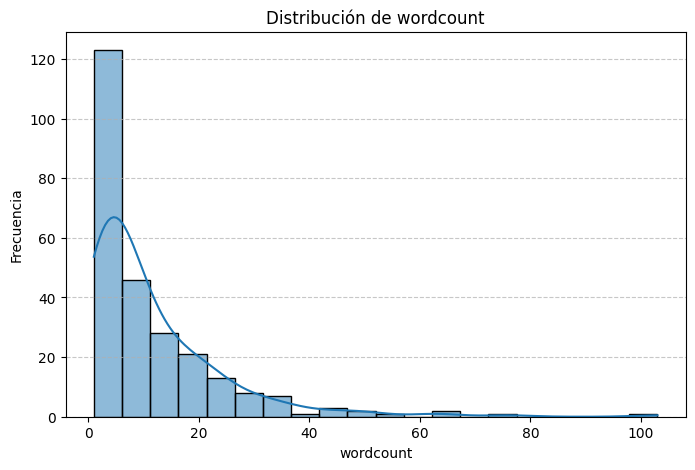

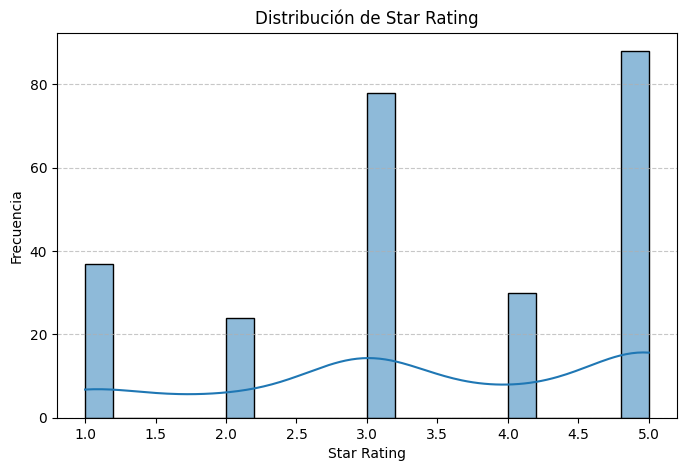

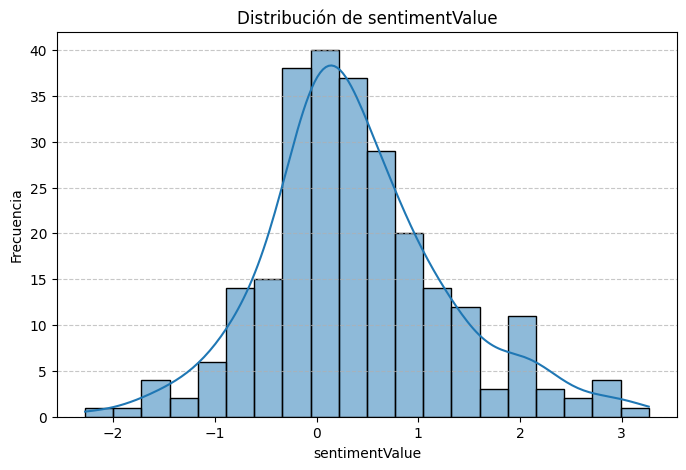

In [12]:


# Eliminar la columna "titleSentiment" si existe
if "titleSentiment" in data.columns:
    data = data.drop(columns=["titleSentiment"])

# Identificar las columnas numéricas
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
print("\nColumnas numéricas detectadas:")
print(numerical_columns)

# Mostrar descripción estadística de las columnas numéricas
print("\nDescripción estadística de las variables numéricas:")
print(data[numerical_columns].describe())

# Mostrar histogramas de las columnas numéricas
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


### Ejercicio 6

Muestra la distribución frecuencial de las variables que consideres categóricas. ¿Habrías que hacerles algún tipo de tratamiento?


Columnas categóricas detectadas:
['Review Title', 'Review Text', 'textSentiment']

Distribución frecuencial de 'Review Title':
Review Title
Muy buena              22
Buena                  15
Genial                  7
Muy util                5
Me gusta                4
                       ..
Si pero con mejoras     1
muy bueno               1
Muy bueno               1
Le doy por ahora        1
Sg S5                   1
Name: count, Length: 186, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_21196\86396706.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


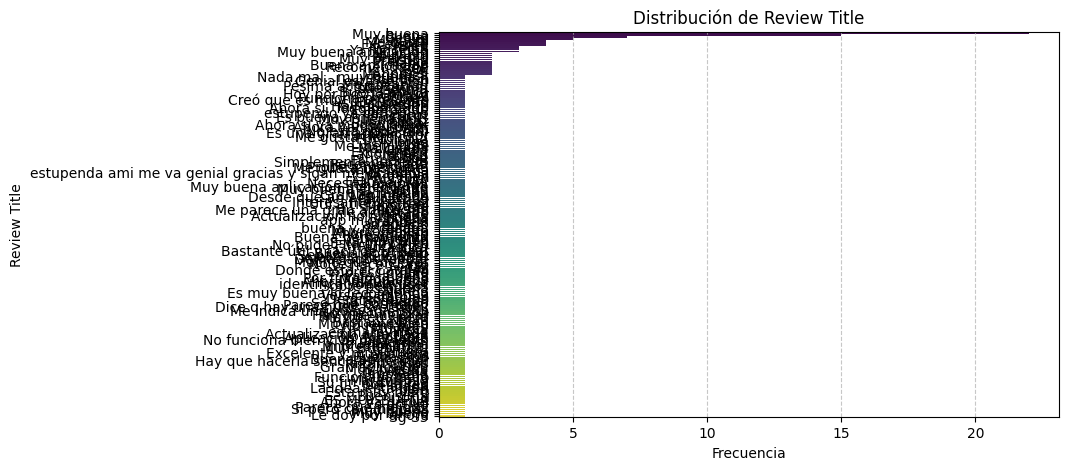


Distribución frecuencial de 'Review Text':
Review Text
…                                                                                                                            10
Genial                                                                                                                        3
Muy bueno                                                                                                                     2
Muy buena                                                                                                                     2
Muy buena app                                                                                                                 2
                                                                                                                             ..
Buenas tardes necesito saber como hago para que…                                                                              1
La nueva actualización, trae                    

C:\Users\hp\AppData\Local\Temp\ipykernel_21196\86396706.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


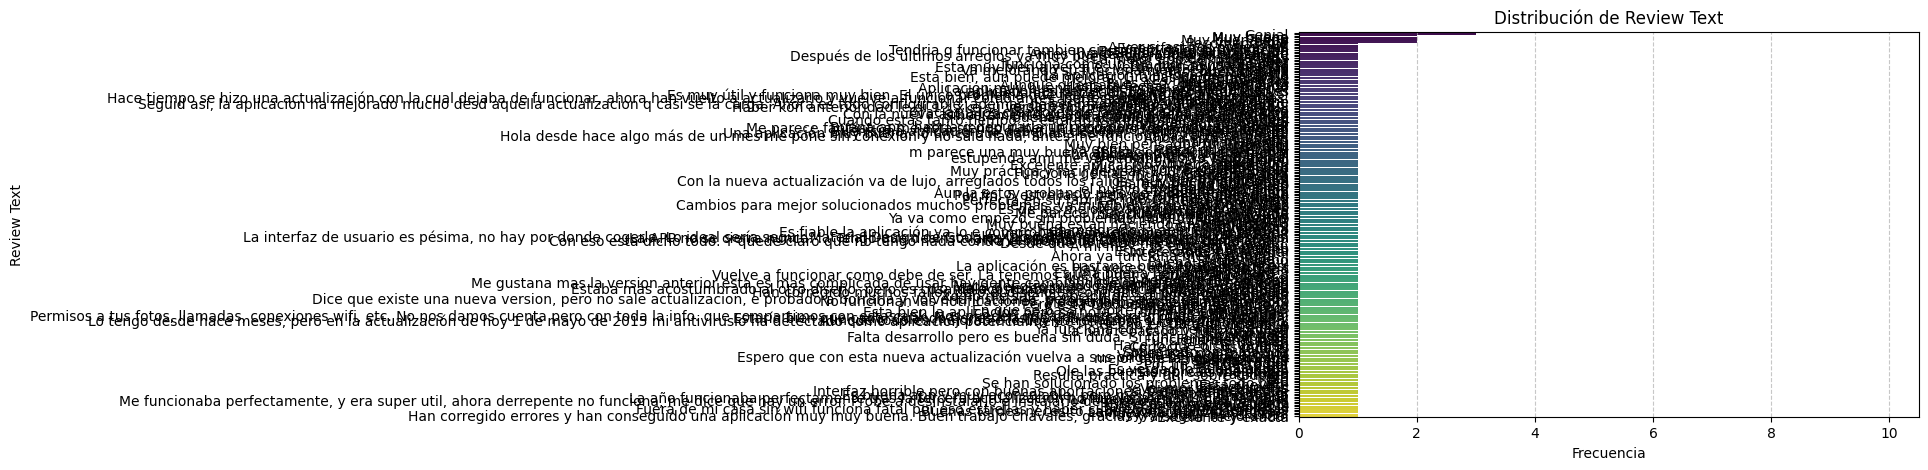


Distribución frecuencial de 'textSentiment':
textSentiment
positive    211
negative     46
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_21196\86396706.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)


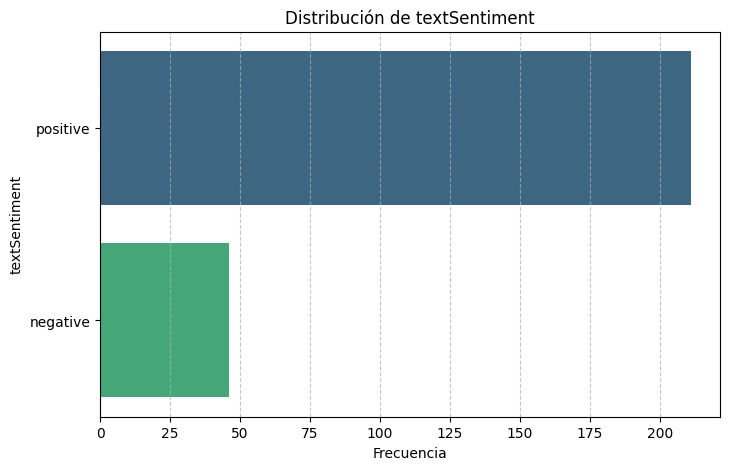

In [13]:


# Eliminar la columna "titleSentiment" si existe
if "titleSentiment" in data.columns:
    data = data.drop(columns=["titleSentiment"])

# Identificar las columnas categóricas
categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()
print("\nColumnas categóricas detectadas:")
print(categorical_columns)

# Mostrar la distribución frecuencial de las variables categóricas
for column in categorical_columns:
    print(f"\nDistribución frecuencial de '{column}':")
    print(data[column].value_counts())
    
    # Visualizar la distribución frecuencial
    plt.figure(figsize=(8, 5))
    sns.countplot(y=data[column], palette="viridis", order=data[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xlabel("Frecuencia")
    plt.ylabel(column)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()


### Ejercicio 7

En un modelado completo habríamos comprobado la relación entre las features y el targer, para estos ejercicios, las vamos a incluir sí o si. Haz el tratamiento de features, haciendo la conversión ordinal de la binaria (usa 1 para positive y 0 para negative) y aplicando el escalado que creas más conveniente en consecuencia para las numéricas

In [33]:





# Eliminar la columna "titleSentiment" si existe
if "titleSentiment" in data.columns:
    data = data.drop(columns=["titleSentiment"])

# Identificar las columnas categóricas binarias (ejemplo: textSentiment y sentimentValue)
binary_columns = ["textSentiment", "sentimentValue"]

# Convertir las binarias a 1 (positive) y 0 (negative)
for column in binary_columns:
    if column in data.columns:
        data[column] = data[column].map({"positive": 1, "negative": 0})
        print(f"\nColumna '{column}' convertida a valores binarios.")

# Identificar las columnas numéricas
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Escalado de las variables numéricas
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nVariables numéricas escaladas con StandardScaler:")
print(numerical_columns)

# Verificar los primeros datos tratados
print("\nPrimeras filas del dataset tratado:")
print(data.head())



Columna 'textSentiment' convertida a valores binarios.

Columna 'sentimentValue' convertida a valores binarios.

Variables numéricas escaladas con StandardScaler:
['wordcount', 'textSentiment', 'Star Rating', 'sentimentValue']

Primeras filas del dataset tratado:
                 Review Title  \
0                Sin conexión   
1                faltan cosas   
2  Es muy buena lo recomiendo   
3             Version antigua   
4                   Esta bien   

                                         Review Text  wordcount  \
0  Hola desde hace algo más de un mes me pone sin...   0.875430   
1                 Han mejorado la apariencia pero no   0.647018   
2                               Andres e puto amoooo  -0.571177   
3  Me gustana mas la version anterior esta es mas...   0.418606   
4                    Sin ser la biblia.... Esta bien  -0.418903   

   textSentiment  Star Rating  sentimentValue  
0            NaN      -1.7204             NaN  
1            NaN      -1.7204        

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [32]:



# Mostrar información básica del dataset
print("Información del dataset:")
print(data.info())

# Mostrar resumen de valores nulos en cada columna
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Mostrar algunos ejemplos de valores en cada columna
print("\nEjemplos de valores por columna:")
for column in data.columns:
    print(f"\nColumna: {column}")
    print(f"Tipo de dato: {data[column].dtype}")
    print(f"Valores únicos (máx. 5): {data[column].unique()[:5]}")


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   textSentiment   257 non-null    int64  
 4   Star Rating     257 non-null    int64  
 5   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 12.2+ KB
None

Valores nulos por columna:
Review Title      0
Review Text       0
wordcount         0
textSentiment     0
Star Rating       0
sentimentValue    0
dtype: int64

Ejemplos de valores por columna:

Columna: Review Title
Tipo de dato: object
Valores únicos (máx. 5): ['Sin conexión' 'faltan cosas' 'Es muy buena lo recomiendo'
 'Version antigua' 'Esta bien']

Columna: Review Text
Tipo de dato: object
Valores únicos (máx. 5): ['Hola desde hace a

### Ejercicio 8

Crea el juego X,y de train y test. Carga el modelo, instancialo con un k=5 para empezar y entrénalo.

In [31]:


# Eliminar la columna "titleSentiment" porque tiene valores nulos y no la vamos a usar
if "titleSentiment" in data.columns:
    data = data.drop(columns=["titleSentiment"])

# Convertir la columna categórica "textSentiment" a valores numéricos
if "textSentiment" in data.columns:
    label_encoder = LabelEncoder()
    data["textSentiment"] = label_encoder.fit_transform(data["textSentiment"])

# Verificar las columnas restantes y sus tipos
print("\nColumnas después de la limpieza:")
print(data.info())

# Definir las variables X (predictoras) y y (target)
X = data.drop(columns=["Review Title", "Review Text", "Star Rating"])  # Excluir columnas no predictoras
y = data["Star Rating"]  # Variable objetivo

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instanciar el modelo KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

print("\nModelo KNN entrenado con éxito con k=5.")



Columnas después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   textSentiment   257 non-null    int64  
 4   Star Rating     257 non-null    int64  
 5   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 12.2+ KB
None

Modelo KNN entrenado con éxito con k=5.


### Ejercicio 9

Evalúalo contra el propio train y contra test, ¿qué puedes decir de los resultados?

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluar el modelo en el conjunto de entrenamiento
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# Mostrar reporte de clasificación en el conjunto de prueba
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))


Precisión en el conjunto de entrenamiento: 0.91
Precisión en el conjunto de prueba: 0.88

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.50      1.00      0.67         2
           3       0.86      0.86      0.86        14
           4       1.00      0.71      0.83         7
           5       1.00      0.95      0.97        19

    accuracy                           0.88        52
   macro avg       0.84      0.88      0.84        52
weighted avg       0.91      0.88      0.89        52



### Ejercicio 10

Vamos a "ajustar a mano" el valor de K, probando diferentes valores entre 1 y 20. Para ello haz un bucle que cambie el valor de K y obtenga mediante validación cruzada el valor del "balanced accuracy" para cada "modelo" y se quede con el k que mejor métrica obtenga. Luego entrena un modelo para ese k y evalúalo contra el target.

In [30]:


# Eliminar la columna "titleSentiment" porque tiene valores nulos y no la vamos a usar
if "titleSentiment" in data.columns:
    data = data.drop(columns=["titleSentiment"])

# Convertir la columna categórica "textSentiment" a valores numéricos
if "textSentiment" in data.columns:
    label_encoder = LabelEncoder()
    data["textSentiment"] = label_encoder.fit_transform(data["textSentiment"])

# Definir las variables X (predictoras) y y (target)
X = data.drop(columns=["Review Title", "Review Text", "Star Rating"])  # Excluir columnas no predictoras
y = data["Star Rating"]  # Variable objetivo

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ajustar manualmente el valor de k
best_k = 1
best_score = 0
scores = []

print("Probando valores de K entre 1 y 20...\n")
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Realizar validación cruzada para calcular el balanced accuracy
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="balanced_accuracy")
    mean_cv_score = cv_scores.mean()
    scores.append((k, mean_cv_score))
    
    print(f"K={k}: Balanced Accuracy = {mean_cv_score:.4f}")
    
    # Actualizar el mejor k
    if mean_cv_score > best_score:
        best_k = k
        best_score = mean_cv_score

print(f"\nEl mejor valor de K es {best_k} con un Balanced Accuracy de {best_score:.4f}.")

# Entrenar el modelo con el mejor valor de K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluar el modelo contra el conjunto de prueba
y_test_pred = best_knn.predict(X_test)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print(f"\nBalanced Accuracy en el conjunto de prueba: {test_balanced_accuracy:.4f}")
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))



Probando valores de K entre 1 y 20...

K=1: Balanced Accuracy = 0.8744
K=2: Balanced Accuracy = 0.8436
K=3: Balanced Accuracy = 0.8518
K=4: Balanced Accuracy = 0.8393
K=5: Balanced Accuracy = 0.8412
K=6: Balanced Accuracy = 0.8312
K=7: Balanced Accuracy = 0.8325
K=8: Balanced Accuracy = 0.8425
K=9: Balanced Accuracy = 0.8165
K=10: Balanced Accuracy = 0.8183
K=11: Balanced Accuracy = 0.7945
K=12: Balanced Accuracy = 0.8003
K=13: Balanced Accuracy = 0.7814
K=14: Balanced Accuracy = 0.7974
K=15: Balanced Accuracy = 0.7894
K=16: Balanced Accuracy = 0.7745
K=17: Balanced Accuracy = 0.7925
K=18: Balanced Accuracy = 0.8005
K=19: Balanced Accuracy = 0.8005
K=20: Balanced Accuracy = 0.7825

El mejor valor de K es 1 con un Balanced Accuracy de 0.8744.

Balanced Accuracy en el conjunto de prueba: 0.8086

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       0.40      1.00  

### Ejercicio 11

Repasa la ficha de KNN o la documentación de sklearn y, usando un grid y una estrategia completa (GridSearch), busca la mejor combinación de k y weights que puedas, empleando de nuevo "balanced_accuracy" como métrica.

In [29]:



# Eliminar la columna "titleSentiment" porque tiene valores nulos y no la vamos a usar
if "titleSentiment" in data.columns:
    data = data.drop(columns=["titleSentiment"])

# Convertir la columna categórica "textSentiment" a valores numéricos
if "textSentiment" in data.columns:
    label_encoder = LabelEncoder()
    data["textSentiment"] = label_encoder.fit_transform(data["textSentiment"])

# Definir las variables X (predictoras) y y (target)
X = data.drop(columns=["Review Title", "Review Text", "Star Rating"])  # Excluir columnas no predictoras
y = data["Star Rating"]  # Variable objetivo

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo base KNN
knn = KNeighborsClassifier()

# Definir los parámetros para la búsqueda de grid
param_grid = {
    'n_neighbors': range(1, 21),  # Valores de k entre 1 y 20
    'weights': ['uniform', 'distance']  # Tipos de ponderación
}

# Configurar GridSearchCV con validación cruzada y balanced_accuracy como métrica
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5,  # Validación cruzada con 5 folds
    verbose=1,  # Mostrar el progreso de la búsqueda
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Realizar la búsqueda de grid
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor balanced_accuracy obtenido: {grid_search.best_score_:.4f}")

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print(f"\nBalanced Accuracy en el conjunto de prueba: {test_balanced_accuracy:.4f}")
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores parámetros encontrados: {'n_neighbors': 1, 'weights': 'uniform'}
Mejor balanced_accuracy obtenido: 0.8744

Balanced Accuracy en el conjunto de prueba: 0.8086

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       0.40      1.00      0.57         2
           3       1.00      0.71      0.83        14
           4       1.00      0.43      0.60         7
           5       0.86      1.00      0.93        19

    accuracy                           0.83        52
   macro avg       0.80      0.81      0.75        52
weighted avg       0.88      0.83      0.82        52

